In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

import pint.fitter
from pint.models import get_model_and_toas
from pint.residuals import Residuals
import pint.logging

pint.logging.setup(level="INFO")

1

In [10]:
parfile= "J1709-4429.par"
timfile= "J1709-4429_p2.tim"

m, t_all = get_model_and_toas(parfile, timfile)
m

INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\observatory\clock_file.py:176 UserWarning: Data points out of range in clock file 'mo2gps.clk'


TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              57778.8453682432610186 (d) frozen=True),
    strParameter(   TZRSITE             mo                frozen=True),
    floatParameter( TZRFRQ              835.062012        (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            57600.0000000000000000 (d) frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 17:09:42.62494630 (hourangle) +/- 0h00m00.051919s frozen=False),
    AngleParameter( DECJ                -44:29:12.95895000 (deg) +/- 0d00m01.2382s frozen=False),
    floatParameter( PMRA                0.0               (mas / yr) frozen=True),
    floatParameter( PMDEC               0.0               (mas / yr) frozen=True)),
  DispersionDM(
    floatParameter( DM                  75.69             (pc / cm3) frozen=True),
    floatParameter( DM1                 UNSET,
    MJDParameter(   DMEPOCH             5760

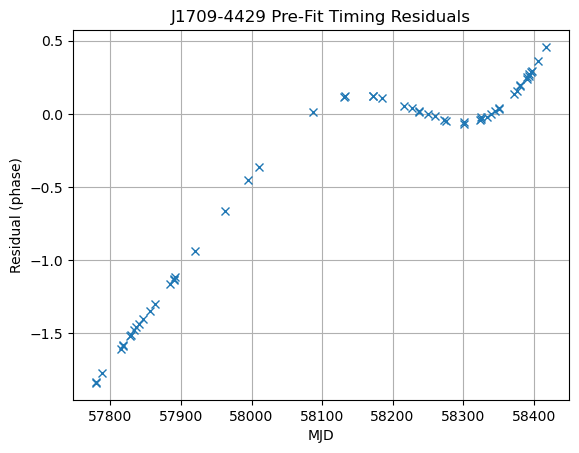

In [11]:
rs = Residuals(t_all, m).phase_resids
xt = t_all.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [12]:
t_all.print_summary()

Number of TOAs:  58
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57778.841 to 58418.203
Date span: 2017-01-25 20:10:59.810848602 to 2018-10-27 04:51:49.845290701
most TOAs (58):
  Min freq:      834.782 MHz
  Max freq:      835.506 MHz
  Min error:     74.4 us
  Max error:     1.27e+03 us
  Median error:  129 us



In [13]:
error_ok = t_all.table["error"] <= 500* u.us
t = t_all[error_ok]
t.print_summary()



Number of TOAs:  48
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57787.824 to 58418.203
Date span: 2017-02-03 19:45:59.731935244 to 2018-10-27 04:51:49.845290701
most TOAs (48):
  Min freq:      834.782 MHz
  Max freq:      835.500 MHz
  Min error:     74.4 us
  Max error:     475 us
  Median error:  124 us



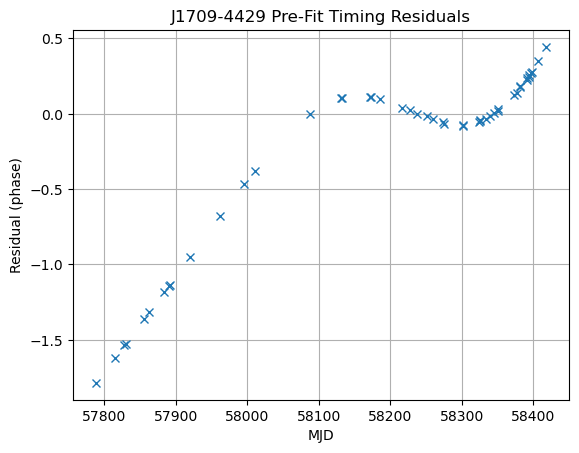

In [14]:
rs = Residuals(t, m).phase_resids
xt = t.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [15]:
f = pint.fitter.Fitter.auto(t, m)
f.fit_toas()

INFO     (pint.fitter                   ): For narrowband TOAs with correlated errors and downhill fitter, returning 'DownhillGLSFitter'


True

In [16]:
f.print_summary()


Fitted model using downhill_gls method with 9 free parameters to 48 TOAs
Prefit residuals Wrms = 34124.00259419108 us, Postfit residuals Wrms = 21361.442179990718 us
Chisq = 524.036 for 38 d.o.f. for reduced Chisq of 13.790

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1709-4429 J1709-4429                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57171.6                      57787.8 d 
FINISH                      58393.3                      58418.2 d 
DILATEFREQ                        N                              None
DMDATA                            N                              None
NTOA   

In [17]:
nu1=9.7542900447
nu2=9.754290000
nudot1=-8.85391e-12
nudot2=-8.8466e-12
dt_days=(58418.2+57787.8)/2-(57767.9+57171.6)/2
dt=dt_days*24*60*60

In [18]:
n=1+(nu1*nudot2-nu2*nudot1)/(nudot1*nudot2*dt)
print(n)

17.63834773344862
